# Exercice 1:  implémenter l'algorithme PCA

In [1]:
#1-Étape 1 : Chargement des données

from sklearn.datasets import load_iris

# Charger les données Iris
iris = load_iris()
X = iris.data

# Afficher la forme des données
print("Forme des données Iris :", X.shape)


Forme des données Iris : (150, 4)


In [3]:
#Étape 2 : Préparation des données

from sklearn.preprocessing import StandardScaler

# Mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stocker les moyennes et les écarts types
means = scaler.mean_
stds = scaler.scale_


In [4]:
#3-Création de la matrice de covariance

import numpy as np

# Créer la matrice de covariance
cov_matrix = np.cov(X_scaled, rowvar=False)

In [5]:
#Étape 4 : Obtention des vecteurs propres et des valeurs propres

# Calculer les vecteurs propres et les valeurs propres
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Trouver le premier composant principal et son importance
print("Valeurs propres :", eigen_values)
print("Vecteurs propres :", eigen_vectors)


Valeurs propres : [2.93808505 0.9201649  0.14774182 0.02085386]
Vecteurs propres : [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


-Le premier composant principal est celui associé à la plus grande valeur propre, car il capture le plus de variance des données.
 Dans ce cas, le premier composant principal est celui associé à la valeur propre 2.93808505.

-Il y a quatre composants principaux (égal au nombre de dimensions des données).

-Nous pouvons garder les deux composants principaux correspondants aux deux premières valeurs propres , car ils capturent une proportion significative de la variance totale.

In [8]:
#créer deux nouveaux vecteurs de caractéristiques :

# Nombre de composants principaux à conserver
n_components_to_keep = 2

# Vecteurs de caractéristiques conservant tous les composants principaux
features_all_components = X_scaled.dot(eigen_vectors)

# Vecteurs de caractéristiques ne conservant que les composants principaux les plus importants
features_selected_components = X_scaled.dot(eigen_vectors[:, :n_components_to_keep])

#print(features_selected_components)

In [14]:
#Étape 5 : Transformation des données vers les nouvelles dimensions 
            #Données transformées = Données mises à l'echelle × Vecteurs propres
X_transformed = X_scaled.dot(np.diag(eigen_values ** 0.5)).dot(eigen_vectors.T)
#print(X_transformed)

In [16]:
 #Étape 6 : Reconstruction du jeu de données initial

# Reconstruction des données originales en utilisant tous les composants principaux
X_reconstructed_All = X_transformed.dot(eigen_vectors.T).dot(np.diag(1 / (eigen_values ** 0.5)))

# Reconstruction des données originales en utilisant un sous-ensemble de composants principaux
#X_reconstructed_subset = X_transformed.dot(eigen_vectors[:, :n_components_to_keep].T).dot(np.diag(1 / (eigen_values[:n_components_to_keep] ** 0.5)))


Non , elle ne marche pas dans le cas du sous ensembles de composants  parce que les dimensions des matrices ne sont pas compatibles lors de la multiplication. 

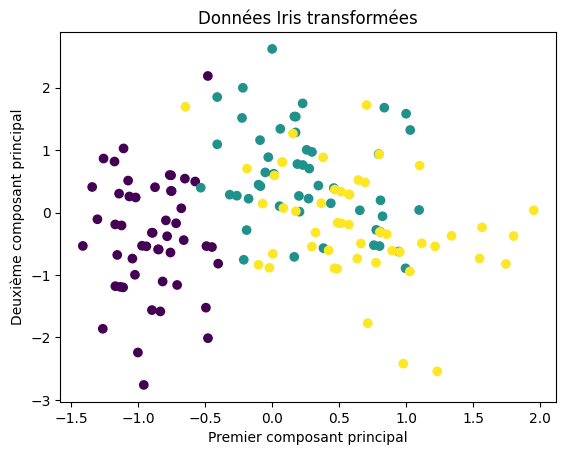

In [17]:
#Étape 7 : Tracé des données transformées

import matplotlib.pyplot as plt

# Tracé des données transformées
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=iris.target)
plt.xlabel('Premier composant principal')
plt.ylabel('Deuxième composant principal')
plt.title('Données Iris transformées')
plt.show()


# Exercice 4 : Clustering avec DBSCAN

In [18]:
#Étape 1 : Importer la classe DBSCAN et charger les données
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

# Charger le jeu de données Iris
iris = load_iris()
X = iris.data

In [20]:
#Étape 2 : Appliquer DBSCAN avec différents paramètres

# Créer une instance de DBSCAN avec des paramètres
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajuster DBSCAN aux données
dbscan.fit(X)

DBSCAN()

In [21]:
#Étape 3 : Évaluer les performances du clustering

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculer le score de silhouette
silhouette_avg = silhouette_score(X, dbscan.labels_)
print(silhouette_avg)

0.48603419703456857


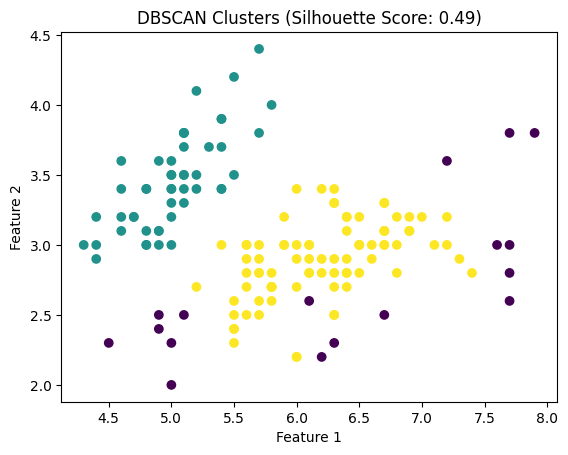

In [22]:
# Visualiser les clusters obtenus
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title(f'DBSCAN Clusters (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [23]:
#Étape 4 : Explorer la sensibilité aux valeurs aberrantes

import numpy as np

# Introduire des valeurs aberrantes dans le jeu de données
outliers = np.array([[10, 10, 10, 10]])  # Exemple de valeurs aberrantes
X_with_outliers = np.vstack([X, outliers])

# Réappliquer DBSCAN sur le jeu de données avec les valeurs aberrantes
dbscan_with_outliers = DBSCAN(eps=0.5, min_samples=5)
dbscan_with_outliers.fit(X_with_outliers)

# Afficher les labels des clusters avec valeurs aberrantes
print("Labels des clusters avec valeurs aberrantes :", dbscan_with_outliers.labels_)


Labels des clusters avec valeurs aberrantes : [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1]


En introduisant des valeurs aberrantes dans le jeu de données, nous pouvons observer que Les valeurs aberrantes sont étiquetées comme -1 par DBSCAN, indiquant qu'elles sont considérées comme du bruit  par l'algorithme.

In [26]:
from sklearn.cluster import KMeans

# Appliquer K-Means sur les données
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Afficher les labels des clusters avec K-Means
print("Labels des clusters avec K-Means :", kmeans.labels_)


Labels des clusters avec K-Means : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
